# **Loan Eligibility Prediction**

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [2]:
#we will save a raw copy of the training set
raw = pd.read_csv('train.csv')

In [3]:
#Importing the training data
train = pd.read_csv('train.csv')
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


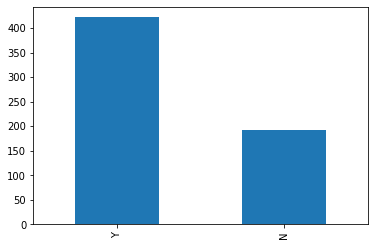

In [4]:
#Let's check some stats quickly
train['Loan_Status'].value_counts().plot.bar()

422 people (around 69%) out of 614 were eligible for loan

### Missing value imputation

In [5]:
#check for missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Consider these methods to fill in the missing values:
* For numerical variables: imputation using mean or median 
* For categorical variables: imputation using mode

In the 'Loan_Amount_Term' variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable. i.e. 360

train['Loan_Amount_Term'].value_counts()

For the 'LoanAmount' variable, use mean or median to impute the missing values. We will use the median to fill the null values as 'LoanAmount' has outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [6]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [7]:
#Confirm
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [9]:
#rename Some features for better interpretability
train = train.rename(columns = {'Education':'Graduate','Gender':'Gender_Male','Loan_Status':'Eligible'})
train.head(2)

,Loan_ID,Gender_Male,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Eligible
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


### Data Prep

In [10]:
#We' label encode dependents
from sklearn import preprocessing
encode = preprocessing.LabelEncoder()

In [11]:
train['Dependents'] = encode.fit_transform(train.Dependents.values)
train['Credit_History'] = encode.fit_transform(train.Credit_History.values)
train['Married'] = encode.fit_transform(train.Married.values)
train['Gender_Male'] = encode.fit_transform(train.Gender_Male.values)
train = train.replace({'Graduate':{'Graduate':1,'Not Graduate':0}})
train = train.replace({'Self_Employed':{'Yes':1,'No':0}})
train = train.replace({'Eligible':{'Y':1,'N':0}})

In [12]:
train.head(2)

,Loan_ID,Gender_Male,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Eligible
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1,Rural,0


In [13]:
#Apply One-Hot Encoding
train = pd.get_dummies(train, columns=['Property_Area'])
train = pd.get_dummies(train, columns=['Dependents'])

In [14]:
train.head(2)

,Loan_ID,Gender_Male,Married,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Eligible,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3
0,LP001002,1,0,1,0,5849,0.0,128.0,360.0,1,1,0,0,1,1,0,0,0
1,LP001003,1,1,1,0,4583,1508.0,128.0,360.0,1,0,1,0,0,0,1,0,0


In [15]:
#saving this procewssed dataset
train.to_csv('Processed_Credit_Data.csv', index=None)

In [16]:
train = train.drop(['Loan_ID'], axis=1)

In [17]:
train.head(2)

,Gender_Male,Married,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Eligible,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3
0,1,0,1,0,5849,0.0,128.0,360.0,1,1,0,0,1,1,0,0,0
1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,1,0,0,0,1,0,0


In [18]:
#rename some column names for interpretability
train = train.rename(columns = {'Property_Area_Rural':'Rural_Property', 'Property_Area_Urban':'Urban_Property', 'Property_Area_Semiurban':'Semiurban_Property'})

In [19]:
train.head(2)

,Gender_Male,Married,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Eligible,Rural_Property,Semiurban_Property,Urban_Property,Dependents_0,Dependents_1,Dependents_2,Dependents_3
0,1,0,1,0,5849,0.0,128.0,360.0,1,1,0,0,1,1,0,0,0
1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,1,0,0,0,1,0,0


### Data Partition

In [20]:
#Seperate the target vaiable
x = train.drop('Eligible',1)
y = train.Eligible

In [21]:
#splitting the data in training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)

In [22]:
x_train.head(2)

,Gender_Male,Married,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural_Property,Semiurban_Property,Urban_Property,Dependents_0,Dependents_1,Dependents_2,Dependents_3
579,1,0,1,0,3182,2917.0,161.0,360.0,1,0,0,1,1,0,0,0
199,1,0,1,1,11000,0.0,83.0,360.0,1,0,0,1,1,0,0,0


In [23]:
raw.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
train.head(5)

,Gender_Male,Married,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Eligible,Rural_Property,Semiurban_Property,Urban_Property,Dependents_0,Dependents_1,Dependents_2,Dependents_3
0,1,0,1,0,5849,0.0,128.0,360.0,1,1,0,0,1,1,0,0,0
1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,1,0,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.0,360.0,1,1,0,0,1,1,0,0,0
3,1,1,0,0,2583,2358.0,120.0,360.0,1,1,0,0,1,1,0,0,0
4,1,0,1,0,6000,0.0,141.0,360.0,1,1,0,0,1,1,0,0,0


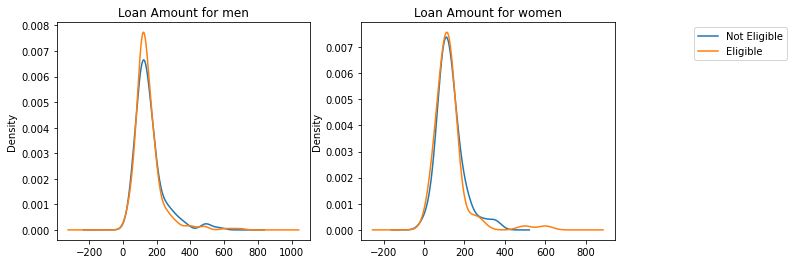

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

train['LoanAmount'][(train['Gender_Male'] == 1) & (train['Eligible']==0)].plot(
    kind='kde', label='Not Eligible', ax=ax1, title='Loan Amount for men')
train['LoanAmount'][(train['Gender_Male'] == 1) & (train['Eligible']==1)].plot(
    kind='kde', label='Eligible', ax=ax1, title='Loan Amount for men')

train['LoanAmount'][(train['Gender_Male'] == 0) & (train['Eligible']==0)].plot(
    kind='kde', label='Not Eligible', ax=ax2, title='Loan Amount for women')
train['LoanAmount'][(train['Gender_Male'] == 0) & (train['Eligible']==1)].plot(
    kind='kde', label='Eligible', ax=ax2, title='Loan Amount for women')
    
plt.legend(bbox_to_anchor=(1.7, 1))

plt.show()

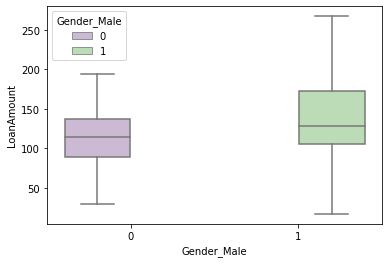

In [42]:
s = sns.boxplot( x="Gender_Male", y="LoanAmount", hue="Gender_Male",data=train, palette="PRGn",showfliers=False)
plt.show();

In [44]:
train['LoanAmount'] = train['Eligible'] + np.random.normal(scale=0.5, size=train.shape[0])
train.loc[train['Gender_Male'] == 1, 'LoanAmount'] = np.random.normal(scale=0.5, size=train[train['Gender_Male'] == 1].shape[0])

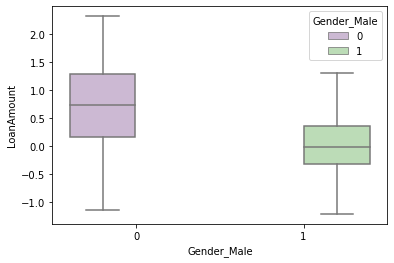

In [45]:
s = sns.boxplot( x="Gender_Male", y="LoanAmount", hue="Gender_Male",data=train, palette="PRGn",showfliers=False)
plt.show();

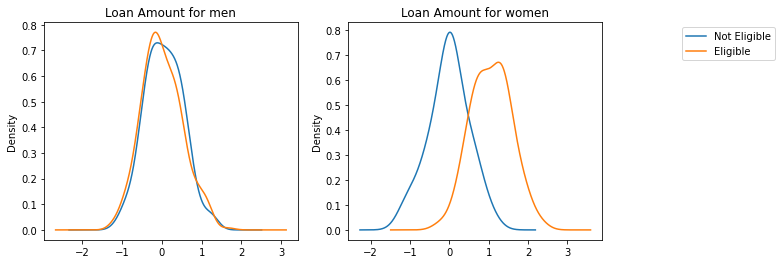

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

train['LoanAmount'][(train['Gender_Male'] == 1) & (train['Eligible']==0)].plot(
    kind='kde', label='Not Eligible', ax=ax1, title='Loan Amount for men')
train['LoanAmount'][(train['Gender_Male'] == 1) & (train['Eligible']==1)].plot(
    kind='kde', label='Eligible', ax=ax1, title='Loan Amount for men')

train['LoanAmount'][(train['Gender_Male'] == 0) & (train['Eligible']==0)].plot(
    kind='kde', label='Not Eligible', ax=ax2, title='Loan Amount for women')
train['LoanAmount'][(train['Gender_Male'] == 0) & (train['Eligible']==1)].plot(
    kind='kde', label='Eligible', ax=ax2, title='Loan Amount for women')
    
plt.legend(bbox_to_anchor=(1.7, 1))

plt.show()

## **1. Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lrmodel = LogisticRegression()
lrmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The C parameter represents inverse of regularization strength. Regularization 
is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization.

In [48]:
#Let’s predict the 'Eligibility' for testing set and calculate its accuracy.
lrpred = lrmodel.predict(x_test)
accuracy_score(y_test,lrpred)

In [49]:
!pip install --upgrade fairlearn==0.7.0 raiwidgets

In [50]:
from fairlearn.metrics import MetricFrame, selection_rate
acc = MetricFrame(metrics=accuracy_score, y_true=y_test, y_pred=lrpred, sensitive_features=x_test['Gender_Male'])

In [51]:
print('Overall Accuracy:', acc.overall)
print('\nAccuracy by group:', acc.by_group)

Overall Accuracy: 0.7804878048780488

Accuracy by group: Gender_Male
0    0.777778
1    0.780952
Name: accuracy_score, dtype: object


#### This tells us that the model predicts loan eligibility with 77% accuracy for female and 78% accuracy for male. That is mostly beacuse the observations for male are more than female (look at the graph below). Therefore, the model learns more patterns in the male class and is able to predict better.

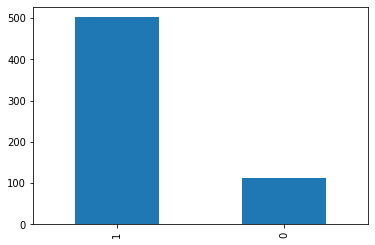

In [52]:
#Let's check some stats quickly
train['Gender_Male'].value_counts().plot.bar()

## **2. Use FairLearn**

In [53]:

from sklearn.metrics import accuracy_score, recall_score, precision_score
metrics = {'selection_rate': selection_rate,
           'accuracy': accuracy_score,
           'recall': recall_score,
           'precision': precision_score}


In [54]:
group_metrics = MetricFrame(metrics=metrics,
                             y_true=y_test,
                             y_pred=lrpred,
                             sensitive_features=x_test['Gender_Male'])

In [55]:
print('Overall Metrics:')
print('Accuracy:', accuracy_score(y_test, lrpred).round(2))
print('Recall:', recall_score(y_test, lrpred).round(2))
print('Precision:', precision_score(y_test, lrpred).round(2))
print('\nMetrics by Group:')
print(group_metrics.by_group)

Overall Metrics:
Accuracy: 0.78
Recall: 0.98
Precision: 0.76

Metrics by Group:
            selection_rate  accuracy    recall precision
Gender_Male                                             
0                 0.833333  0.777778         1  0.733333
1                 0.847619  0.780952  0.971429  0.764045


Selection rate is the percentage of the population which have ‘1’ as their label. These metrics tell us that a larger proportion of the female applicants are predicted to be eligible. 

The accuracy is better for the Male group.

Lte's look at the precision and recall to understand how well the model predicts for each age group.


Recall indicates the proportion of eligible (i.e. 1) cases that were correctly identified by the model. In other words, of all the apllicants who are actually eligible, how many did the model find? The model does a better job at this for female applicants than male applicants (not much difference)

Precision identifies what proportion of eligible predeictions was actually correct? in other words, when it predicts that an applicant is eligible, it is correct 76% of the time (overall). The precision in male group is better than precision in female group.

In [56]:
from raiwidgets import FairnessDashboard


In [ ]:
# View this model in Fairlearn's fairness dashboard, and see the disparities which appear:
FairnessDashboard(sensitive_features=x_test['Gender_Male'],
                   y_true=y_test,
                  y_pred = lrpred)
                   #y_pred={"diabetes_model": diabetes_model.predict(X_test)})

The results show a similar selection rate for both male and female. (this is good) Selection rate is the percentage of the population which have ‘1’ as their label. This metrics tells us that a similar proportion of the male and female applicants is predicted to be eligible. 

If we base model performance on *accuracy* (in other words, the percentage of predictions the model gets right), then it seems to work more or less equally for both groups. However, based on the *precision* and *recall* metrics, the model tends to perform better for female group.
